# Modélisation Mathématique: contrôle continu (CC)

**Novembre 2023**

- Travail individuel.
- Toute documentation autorisée.
- Internet autorisé, à l'exception des outils de type Chat GPT ainsi que tout moyen de communication entre vous.
- N'hésitez pas à me poser des questions (plutôt que d'essayer de tricher).

## Librairies

In [1]:
import numpy as np
from collections import Counter
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

## Exercice 1

Soit le **train set** $S_{\rm train} = \left\{ \left( \boldsymbol{x_1}, y_1 \right), \dots, \left( \boldsymbol{x_N}, y_N \right) \right\}$ composé de $N$ observations. 
La matrice des **features** $\boldsymbol{X}$ et le vecteur (ou matrice) des **targets** $\boldsymbol{y}$ sont définis de la manière suivante:

$$
\boldsymbol{X} =
\begin{pmatrix}
1 & \boldsymbol{x_1}^T \\
\vdots & \vdots \\
1 & \boldsymbol{x_N}^T 
\end{pmatrix}
=
\begin{pmatrix}
1 & x_{11} & \cdots & x_{1p} \\
\vdots & \vdots & \ddots & \vdots \\
1 & x_{N1} &\cdots & x_{Np}
\end{pmatrix}~
\text{  et  }~
\boldsymbol{y} =
\begin{pmatrix}
y_1 \\
\vdots \\
y_N 
\end{pmatrix}
$$


La solution de la **régression linéaire** est le vecteur de coefficients $\boldsymbol{\hat \beta}$ qui satisfait (cf. cours)

$$
\boldsymbol{\hat{\beta}} 
= \underset{\boldsymbol{\beta}}{\arg \min} \, \left\| \boldsymbol{X} \boldsymbol{\beta} - \boldsymbol{y} \right\|^2
$$


- Étant donné les data `X, y` ci-dessous, implémentez une **descente de gradient** – et non la solution analytique vue en cours – pour déterminer le vecteur de paramêtres $\boldsymbol{\hat{\beta}}$ qui minimise l'expression ci-dessus.

 Dans votre algorithme, vous pouvez utiliser comme learning rate et toléreece `lamda=1e-3, epsilon=1e-3`.
 
 Votre solution vous paraît-elle correcte? Justifiez.
 
 
- **(Bonus)** Êtes-vous capable de généraliser votre algorithme au cas de la **régression Ridge**?

In [2]:
# data
X = np.random.uniform(-1, 1, size=(200,3))
coeff = np.random.uniform(-5, 5, size=(4))
noise = np.random.normal(0, 1, size=(200))
y = coeff[0] + coeff[1]*X[:,0] + coeff[2]*X[:,1] + coeff[3]*X[:,2] + noise

In [3]:
X.shape, y.shape

((200, 3), (200,))

### Réponse

## Exercice 2

Le code ci-dessous génère et représente des data tri-dimensionnelles `X` en forme de spirale.

In [4]:
def circle(r, x1):
    return np.sqrt(r**2 - x1**2)

In [5]:
X_1, X_2, X_3 = np.zeros(300), np.zeros(300), np.zeros(300)

for i in range(3):
    tmp = np.linspace(-(i+1), (i+1), num=50)
    X_1[i*100:(i+1)*100] = np.hstack([tmp, tmp])
    X_2[i*100:(i+1)*100] = np.hstack([circle(i+1, tmp), -circle(i+1, tmp)])
    X_2[i*100:(i+1)*100] = X_2[i*100:(i+1)*100] + np.random.normal(0, 0.2, size=(100))
X_3 = np.arange(0, 5, step=5/300)

X = np.vstack([X_1, X_2, X_3]).T

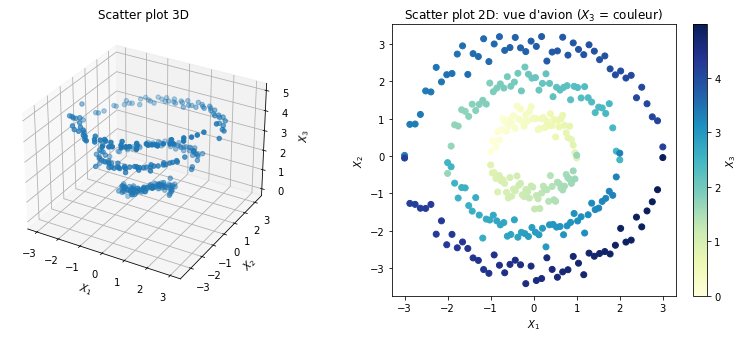

In [6]:
fig = plt.figure(figsize=(14,5))

ax1 = fig.add_subplot(121,projection='3d')
ax1.set_title("Scatter plot 3D")
ax1.scatter(X[:,0], X[:,1], X[:,2], marker="o")
ax1.set_xlabel('$X_1$')
ax1.set_ylabel('$X_2$')
ax1.set_zlabel('$X_3$')

ax2 = fig.add_subplot(122)
ax2.set_title("Scatter plot 2D: vue d'avion ($X_3$ = couleur)")
scatter = ax2.scatter(X[:,0], X[:,1], c=X[:,2], cmap="YlGnBu")
ax2.set_xlabel('$X_1$')
ax2.set_ylabel('$X_2$')
fig.colorbar(scatter, label='$X_3$')

plt.show()

Implémentez une version de l'algorithme **K-means** qui clusterise les data `X` en 3 clusters, mais uniquement selon leur troisième composante `X[:, 2]`.

Après clustering, si vous imprimez les 2 premières composantes `X[:, 0]` et `X[:, 1]` de vos data `X`, vous devriez obtenir un plot similaire à celui ci-dessous.

**Indications:**
- Vous pouvez par exemple de modifier l'algorithme **K-means** du TP 3.
- Pour que cet algorithme fonctionne bien, initialisez vos centroïdes à `1`, `2` et `3` (par exemple).

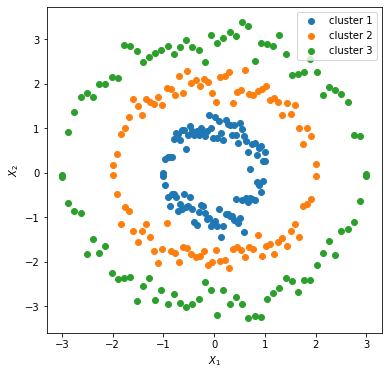

In [13]:
# plot
plt.figure(figsize=(6,6))

plt.scatter(X[0:100,0], X[0:100,1], label="cluster 1")
plt.scatter(X[100:200,0], X[100:200,1], label="cluster 2")
plt.scatter(X[200:300,0], X[200:300,1], label="cluster 3")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.legend(loc="upper right")
plt.show()

### Réponse

## Exercice 3

Le code ci-dessous génère et représente des data bi-dimensionnelles `X` clusterisées. Le clsuter des points de `X` est donné par le vecteur `y`.

In [8]:
X = np.zeros(shape=(300, 2))
y = np.zeros(shape=(300))

for i in range(3):

    X_12 = np.random.normal(i, 0.3, size=(100, 2))
    X[i*100:(i+1)*100, :] = X_12
    y[i*100:(i+1)*100] = i

L'algorithme des **$k$ plus proches voisins (KNN)** avec $k=7$ sur le dataset `X, y` engendre le clustering représenté dans la figure ci-dessous (figure de gauche).

Implémenter une variante de l'algorithme KNN avec $k=7$ qui clusterise les points de l'espace en appliquant KNN aux deuxièmes composantes des data uniquement. Le résultat (approximatif) de ce clustering est illustré ci-dessous (figure de droite).

Plus précisément, un point $x = (x_1, x_2)$ sera de classe violette (resp. verte, jaune) si, parmi les data `X`, les $k$ points $(x^1_{1}, x^1_{2}), (x^2_{1}, x^2_{2}), \dots, (x^k_{1}, x^k_{2})$ dont les deuxièmes composantes $x^1_{2}, x^2_{2}, \dots, x^k_{2}$ sont les plus proches de $x_2$ sont majoritairement de classes violette (resp. verte, jaune).

N'hésitez pas à m'appeler pour clarifier la donnée si besoin.

In [9]:
# KNN clustering (k=7)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X, y)

# Approximate clustering (close to desired solution)
min, max = np.min(X), np.max(X)

def dummy_clustering(x_new):
    
    x2 = x_new[1]
    if min <= x2 and x2 <= 0.5:
        c = 0
    elif 0.5 < x2 and x2 <= 1.5:
        c = 1
    else:
        c = 2
    return c

# clustering all 2D points
X1, X2 = np.meshgrid(np.linspace(min, max, 30), np.linspace(min, max, 30))

desired_clusters = np.zeros((30,30))
knn_clusters = np.zeros((30,30))

for i in range(30):
    for j in range(30):
        knn_clusters[i,j] = int( knn.predict( np.array([[X1[i,j],X2[i,j]]]) )[0] )
        desired_clusters[i,j] = dummy_clustering( np.array([X1[i,j],X2[i,j]]) )

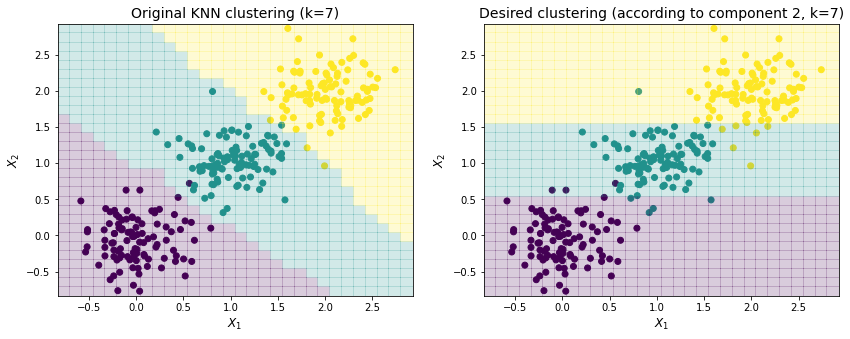

In [10]:
# plot
fig = plt.figure(figsize=(14,5))

ax1 = fig.add_subplot(121)
ax1.set_title("Original KNN clustering (k=7)", size=14)
ax1.scatter(X[:,0], X[:,1], c=y, alpha=1)
ax1.pcolor(X1, X2, knn_clusters, alpha=0.2)
ax1.set_xlabel('$X_1$', size=12)
ax1.set_ylabel('$X_2$', size=12)

ax2 = fig.add_subplot(122)
ax2.set_title("Desired clustering (according to component 2, k=7)", size=14)
ax2.scatter(X[:,0], X[:,1], c=y, alpha=1)
ax2.pcolor(X1, X2, desired_clusters, alpha=0.2)
ax2.set_xlabel('$X_1$', size=12)
ax2.set_ylabel('$X_2$', size=12)

plt.show()

### Réponse